# Jigsaw puzzle solving via SMC with Permutations

[Article](https://cis.temple.edu/~latecki/Papers/IJCV2014.pdf)

Implementation needs :

1. Image handling :

    a. Loading
    
    b. Resizing
    
    c. Splitting into puzzle pieces
    
2. Graph :

    a. Define M mutex and deduce compatible candidates
    
    b. Extract subgraph _neighborhood_
    
    c. Showing reconstructed image with subgraph
    
3. Affinity matrix

    a. Dissimilarity : $D(p_i, p_j, \cdot)$ with $\cdot$ being the direction to compare ($p_j$ to the left, right, top, or bottom of $p_i$)
    
    b. Compute $\delta_i$ as the difference between the two lowest $D(p_i, p_j)$ values accross all $p_j$.
    
    c. Then $A(i,j) = exp(-\frac{D(p_i, p_j, \cdot)}{2\delta^2})$ if $p_i$ and $p_j$ are adjacent, else $0$.

In [10]:
# imports
import os
from os import path as osp

import numpy as np
from scipy import ndimage

%matplotlib inline
import matplotlib.pyplot as plt

/home/demonet_guillaume/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/demonet_guillaume/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
# globals
BASE_PATH = osp.abspath('../')
IMG_PATH = osp.join(BASE_PATH, 'img')

## Image manipulation

(-0.5, 671.5, 503.5, -0.5)

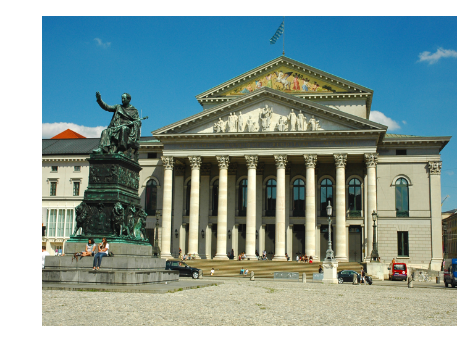

In [49]:
# acquire an image to make some tests

def img_path(img_id):
    return osp.join(IMG_PATH, '{}.png'.format(img_id))

sample = ndimage.imread(img_path(6))
plt.imshow(sample)
plt.axis('off')

In [18]:
sample.shape

(504, 672, 3)

All images (stored in `path/to/repo/img/`) are of shape **504x672**. We can thus split them into **9x12** grids of equal squares of size **56**. The following shows the grid :

(0.0, 672.0, 504.0, 0.0)

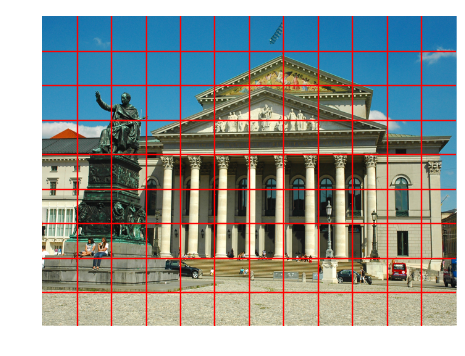

In [50]:
plt.imshow(sample)

for i in range(1,12):
    plt.plot([56*i,56*i],[0,504], 'r-')
for i in range(1,9):
    plt.plot([0,672], [56*i,56*i], 'r-')
    
plt.axis([0,672,504,0])
plt.axis('off')

To manipulate pieces of the jigsaw puzzle, we need to store them as separate images. The split is defined below :

In [35]:
# define a splitter function
def split_img(img, size=56):
    pieces = []
    vshape = img.shape[0]
    hshape = img.shape[1]
    
    if vshape%size != 0 or hshape%size != 0:
        raise 'Problem with image shape and patch size'
    
    for hb in range(0,hshape,size):
        #b for begin, e for end
        he = hb + size
        for vb in range(0,vshape,size):
            ve = vb + size
            pieces.append(img[vb:ve, hb:he, :])
            
    return pieces

In [52]:
pieces = split_img(sample)
len(pieces)

108

So the puzzle is correctly made out of 108 (9x12) pieces, as in the aforementioned article. However, the images are still ordered :

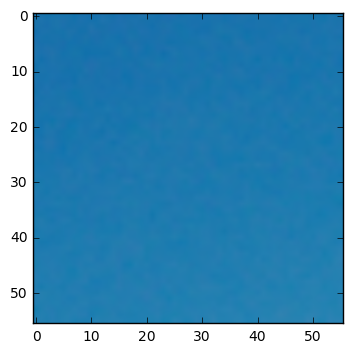

In [53]:
plt.imshow(pieces[0]) # should be top left corner, hence blue sky

Let's add some shuffling :

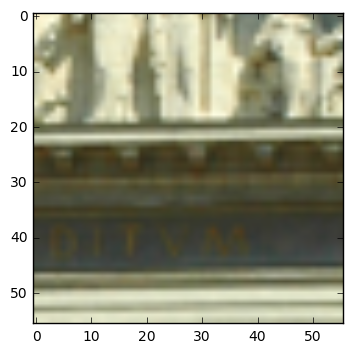

In [54]:
np.random.shuffle(pieces)
plt.imshow(pieces[0]) #shouldn't be (probably) blue sky anymore

## Graph manipulation

## Affinity matrix

## Puzzle solving